In [43]:
import os
from sklearn import datasets
import pandas as pd
import dask.dataframe as dd
from pathlib import Path

In [44]:
HOME_Path = Path(os.getcwd()).parent
data_Path = HOME_Path / "data"

# Load Iris dataset

In [45]:
iris = datasets.load_iris()

In [46]:
columns = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)"
]

df = pd.DataFrame(data=iris.data,
                  columns=columns,
                 )

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
len(df)

150

## Save as CSV

In [49]:
df.to_csv(path_or_buf=str(data_Path / "iris.csv"),
          index=False,
         )

# Load with DASK

# Pandas to Dask
pandasからdaskに切り替えることができる

In [50]:
ddf1 = dd.from_pandas(data=df, npartitions=2)
ddf1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
# 分割された分かれ目を確認
ddf1.divisions

(0, 75, 149)

In [52]:
# 分割数を確認
ddf1.npartitions

2

## Sum

In [67]:
ddf1.sum().compute()

sepal length (cm)    876.5
sepal width (cm)     458.1
petal length (cm)    563.8
petal width (cm)     179.8
dtype: float64

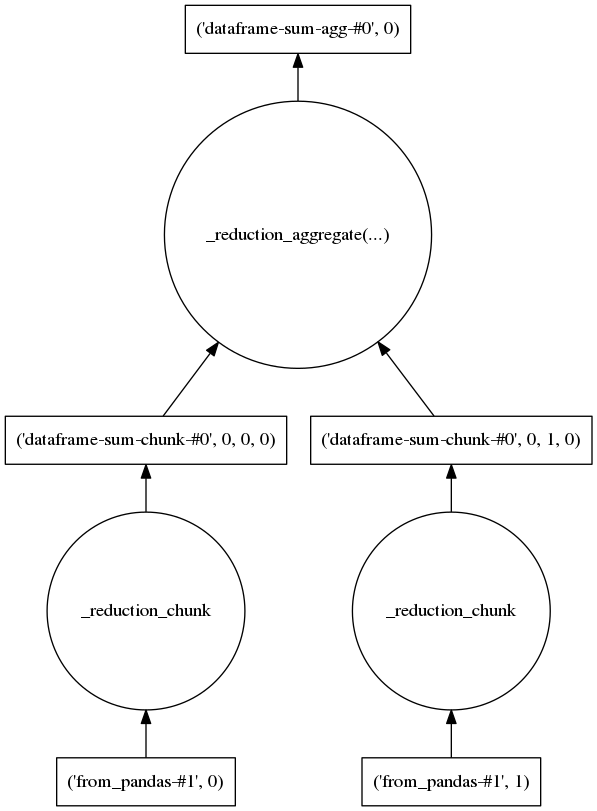

In [68]:
ddf1.sum().visualize()

## Mean

In [55]:
ddf1.mean().compute()

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

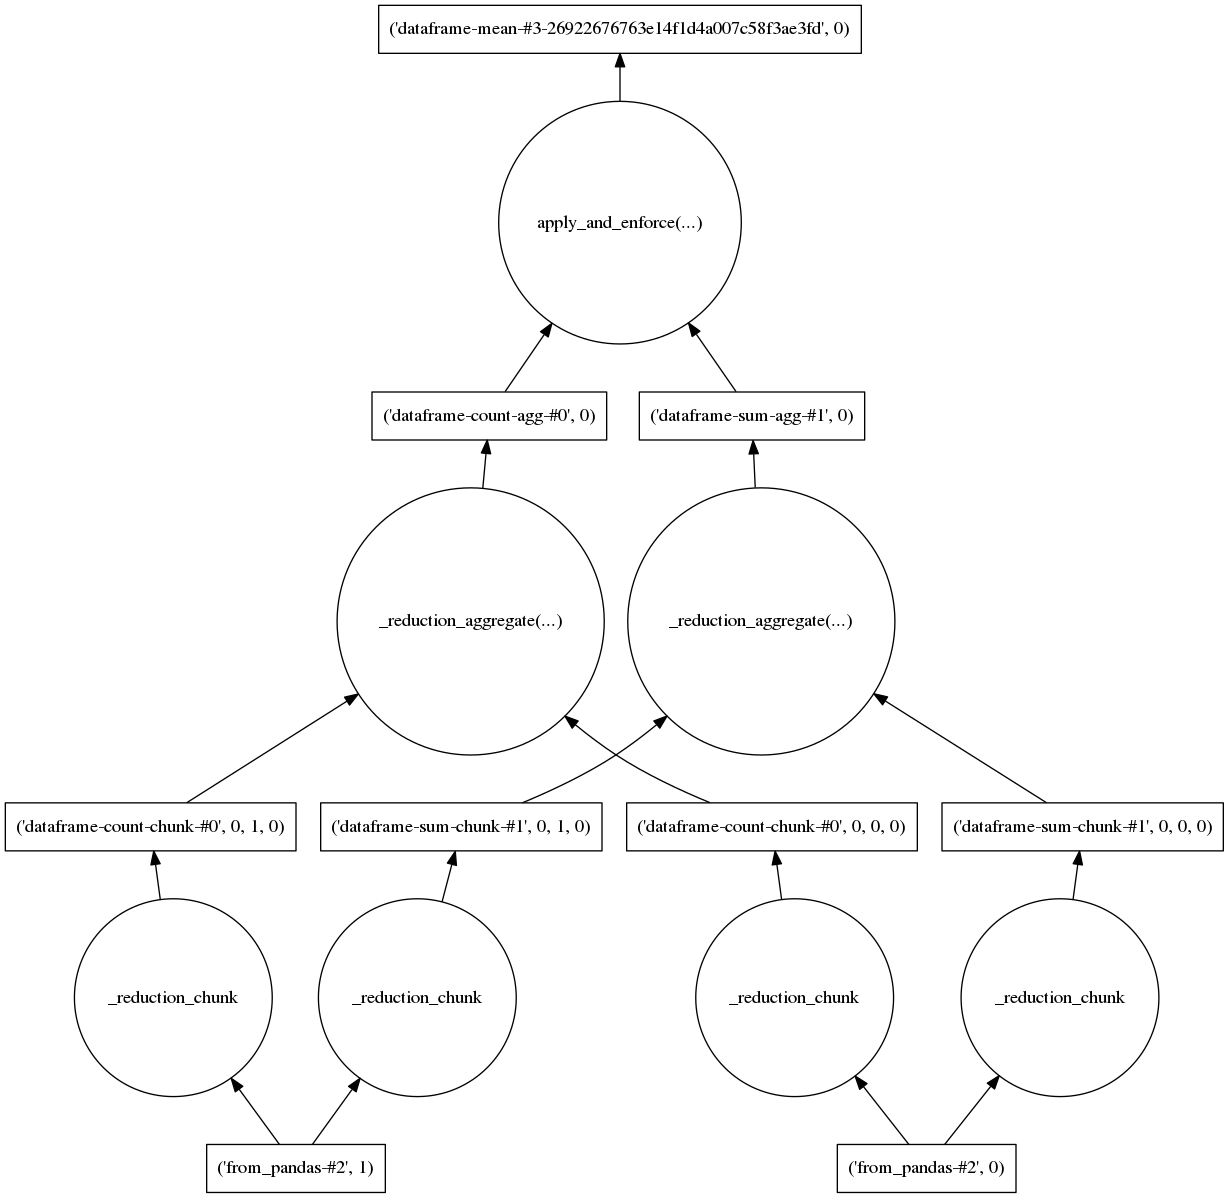

In [56]:
ddf1.mean().visualize()

# Load CSV with DASK

In [81]:
# blocksizeをbyte単位で指定可能
df = dd.read_csv(urlpath=str(data_Path / "iris.csv"), blocksize=1500,)

In [82]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
# 分割数を確認
df.npartitions

2

## sum && mean

In [85]:
df_sum = df.sum()
print("sum")
print(df_sum)

df_mean = df.mean()
print("mean")
print(df_mean)

sum
Dask Series Structure:
npartitions=1
petal length (cm)    float64
sepal width (cm)         ...
dtype: float64
Dask Name: dataframe-sum-agg, 9 tasks
mean
Dask Series Structure:
npartitions=1
petal length (cm)    float64
sepal width (cm)         ...
dtype: float64
Dask Name: dataframe-mean, 13 tasks


### Delayed

In [98]:
from dask import delayed
def inc(x):
    return x + 1
print("Not delayed: ", inc(10))

x = delayed(inc, pure=True)(10)
print("delayed: ", x)
print("delayed compute: ", x.compute())

Not delayed:  11
delayed:  Delayed('inc-6e45b15e167988c125e70c84590f449d')
delayed compute:  11


In [99]:
@delayed(pure=True)
def add(a, b):
    return a + b
print("delayed: ", add(1, 2))
print("delayed compute: ", add(1, 2).compute())

delayed:  Delayed('add-cc8b75386ecb0813afe88e7288f4558a')
delayed compute:  3


output:  16


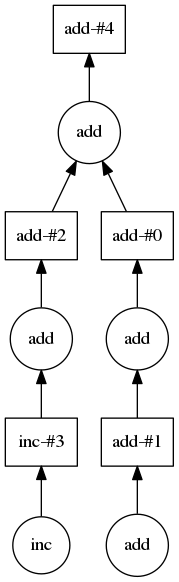

In [129]:
dinc = delayed(inc)
layer = add(add(5, dinc(4)), add(3, add(1, 2)))
print("output: ", layer.compute())
layer.visualize(filename="../data/dask_visualize/add_inc_vis.png")

## SUM && MEAN

In [86]:
df_sum = df.sum()
print("sum")
print(df_sum.compute())

df_mean = df.mean()
print("mean")
print(df_mean.compute())

sum
sepal length (cm)    876.5
sepal width (cm)     458.1
petal length (cm)    563.8
petal width (cm)     179.8
dtype: float64
mean
sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64


## sum vis

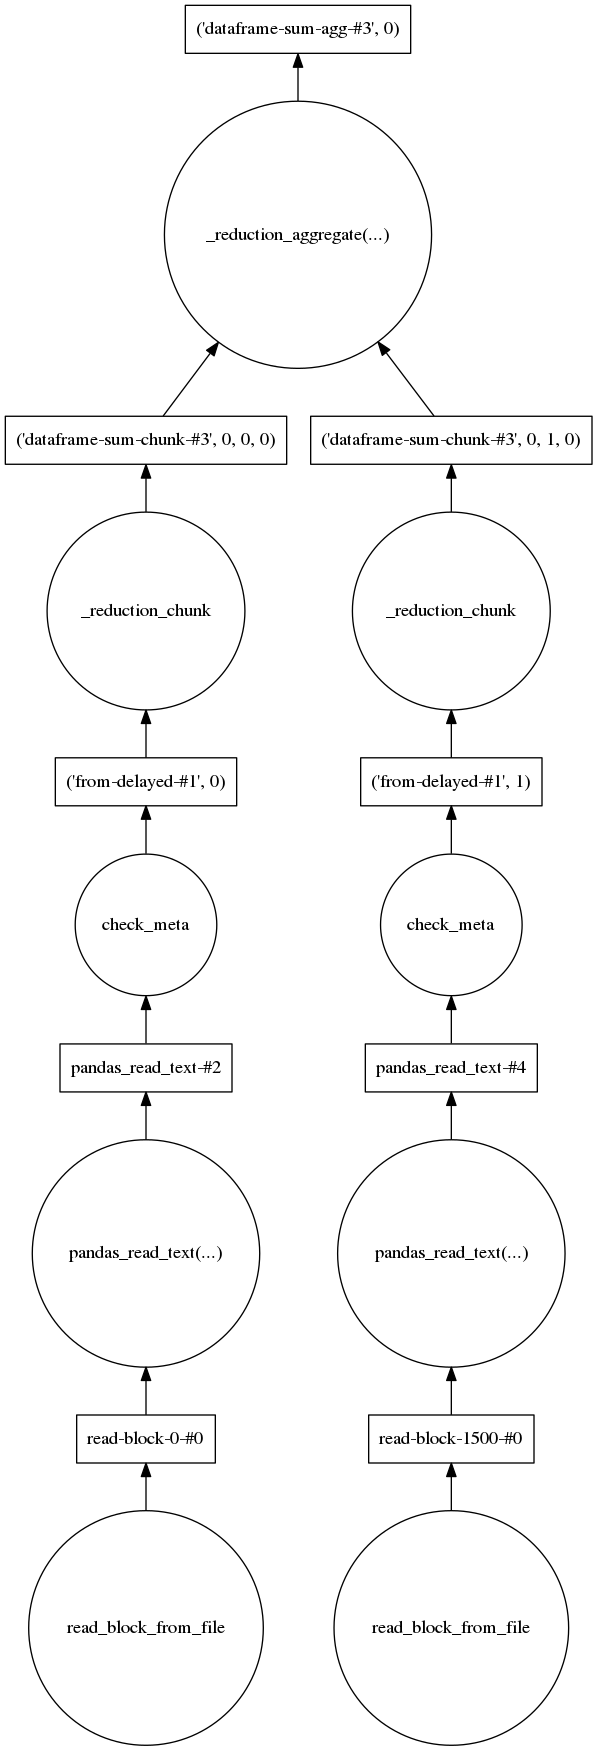

In [130]:
df_sum.visualize(filename="../data/dask_visualize/df_sum.png")

## mean vis

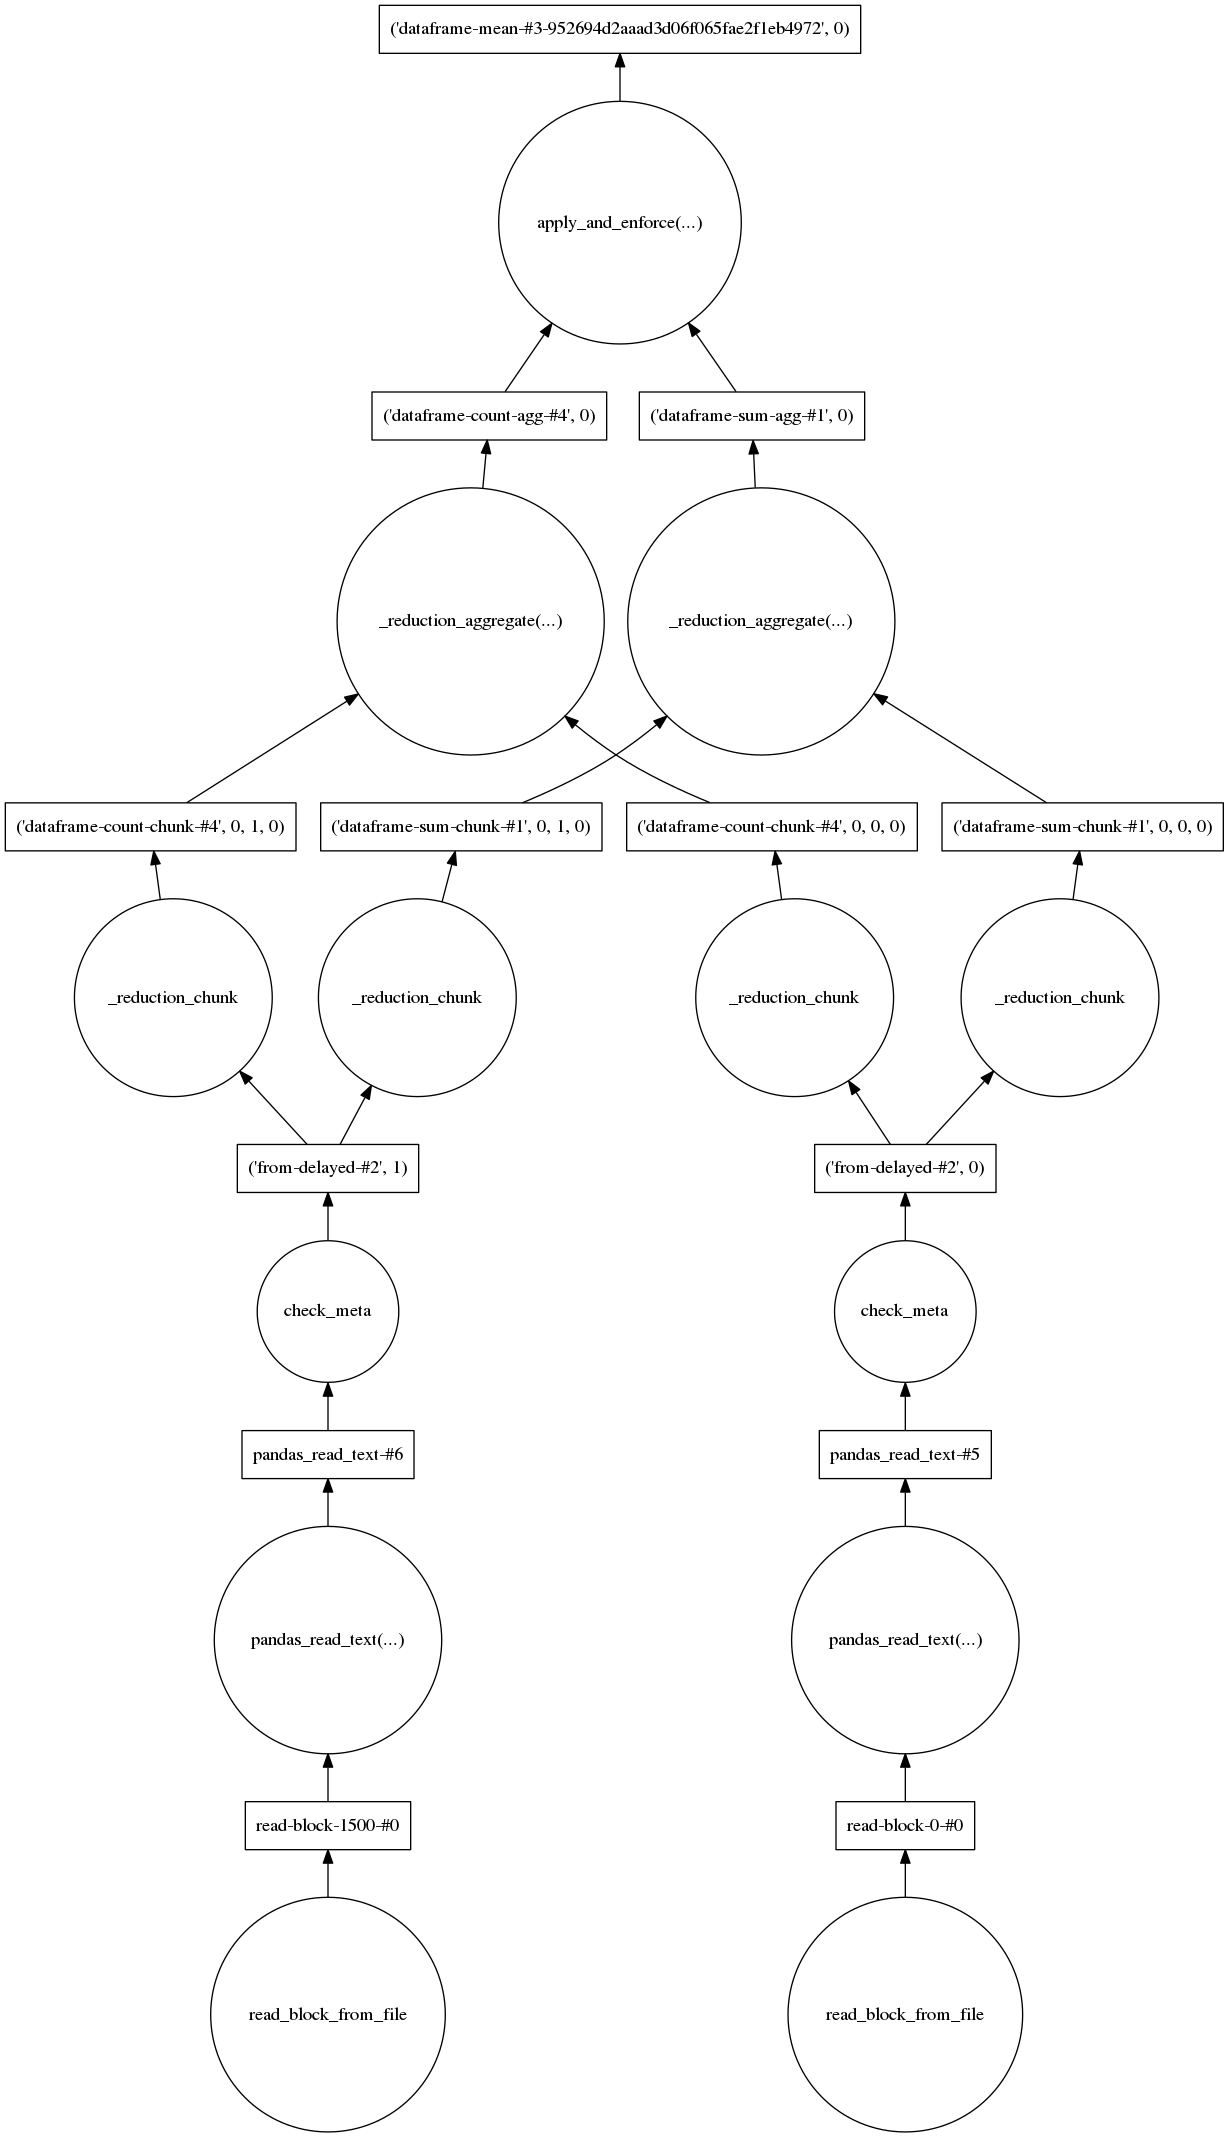

In [131]:
df_mean.visualize(filename="../data/dask_visualize/df_mean.png")

## df.compute()

In [123]:
aa = df.compute()
type(aa)

pandas.core.frame.DataFrame